In [1]:
import os
import pandas as pd 

In [2]:
dd = './gambling_asesores_final/'
assessments = []
for f in os.listdir(dd):
    df = pd.read_csv(dd+'/'+f, index_col=0)
    df["topic"] = int(f.replace('.csv','')) + 1
    assessments.append(df)
    print("Number of relevants per consensus", df[df["consensus"]==True]['doc_id'].count(), "out of", len(df))
    print("Number of relevants per majority", df[df["majority"]==True]['doc_id'].count(), "out of", len(df))
    print()

Number of relevants per consensus 3 out of 103
Number of relevants per majority 7 out of 103

Number of relevants per consensus 3 out of 109
Number of relevants per majority 8 out of 109

Number of relevants per consensus 11 out of 103
Number of relevants per majority 24 out of 103

Number of relevants per consensus 13 out of 134
Number of relevants per majority 27 out of 134

Number of relevants per consensus 3 out of 117
Number of relevants per majority 11 out of 117

Number of relevants per consensus 14 out of 114
Number of relevants per majority 23 out of 114

Number of relevants per consensus 3 out of 121
Number of relevants per majority 12 out of 121

Number of relevants per consensus 8 out of 91
Number of relevants per majority 16 out of 91

Number of relevants per consensus 8 out of 107
Number of relevants per majority 16 out of 107



In [3]:

final = pd.concat(assessments)
print(final.columns)

Index(['doc_id', 'text', 'manu.couto1k_rels', 'marcosfp_rels',
       'ezra.mario_rels', 'consensus', 'majority', 'topic'],
      dtype='object')


In [4]:
final

,doc_id,text,manu.couto1k_rels,marcosfp_rels,ezra.mario_rels,consensus,majority,topic
0,405250,No creo que le hecho de dejar de jugar sea jod...,True,True,False,False,True,3
1,75525,Evidentemente el que no quiere dejar de jugar ...,False,False,False,False,False,3
2,434950,No intentes recuperar jamás lo que perdiste vo...,False,False,False,False,False,3
3,474374,En mi caso yo creía que no tenía pero cuando d...,True,True,True,True,True,3
4,211974,STOP PLAYING,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...
102,106989,De veras esto es mucho más serio de lo que pue...,False,False,False,False,False,8
103,334324,Tú planteas que durante 15 dias el ludópata ha...,False,False,False,False,False,8
104,127484,Quizás no puedas pagar nunca tus deudas pero s...,False,False,False,False,False,8
105,447741,ha dejado alguna vez de hacer algo importante...,True,False,False,False,False,8


In [5]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(final['manu.couto1k_rels'].values, final['marcosfp_rels'].values)

0.4621155767146289

In [14]:
cohen_kappa_score(final['manu.couto1k_rels'], final['ezra.mario_rels'])

0.41305269904706243

In [15]:
cohen_kappa_score(final['marcosfp_rels'], final['ezra.mario_rels'])

0.44795325705143807

In [28]:
import krippendorff
krippendorff.alpha(reliability_data=[list(final['marcosfp_rels'].astype(int).values), list(final['ezra.mario_rels'].astype(int).values),list(final['manu.couto1k_rels'].astype(int).values)])

0.43685967429961936

In [20]:
#### Automatic labelling GPT-4
import numpy as np 

gpt4 = pd.read_csv('./outputs/gpt-4.csv', names=["topic","doc_id", "label"])
gpt4['label'] = np.where(gpt4['label']=="Relevante", True, gpt4['label'])
gpt4['label'] = np.where(gpt4['label']=="No relevante", False, gpt4['label'])
gpt4

,topic,doc_id,label
0,1,265216,True
1,1,92161,False
2,1,68608,False
3,1,483331,True
4,1,130052,True
...,...,...,...
3160,9,357360,False
3161,9,10226,True
3162,9,342004,True
3163,9,10231,False


In [19]:
final.columns

Index(['doc_id', 'text', 'manu.couto1k_rels', 'marcosfp_rels',
       'ezra.mario_rels', 'consensus', 'majority', 'topic'],
      dtype='object')

In [20]:
gpt4.columns

Index(['topic', 'doc_id', 'label'], dtype='object')

In [8]:
final['doc_id'] = final['doc_id'].astype(int)
final['topic'] = final['topic'].astype(int)
gpt4['doc_id'] = gpt4['doc_id'].astype(int)
gpt4['topic'] = gpt4['topic'].astype(int)
final = final.merge(gpt4, how='left', on=["doc_id", "topic"])
final["label"] = final["label"].astype(bool)
final

,doc_id,text,manu.couto1k_rels,marcosfp_rels,ezra.mario_rels,consensus,majority,topic,label
0,405250,No creo que le hecho de dejar de jugar sea jod...,True,True,False,False,True,3,False
1,75525,Evidentemente el que no quiere dejar de jugar ...,False,False,False,False,False,3,False
2,434950,No intentes recuperar jamás lo que perdiste vo...,False,False,False,False,False,3,False
3,474374,En mi caso yo creía que no tenía pero cuando d...,True,True,True,True,True,3,True
4,211974,STOP PLAYING,False,False,False,False,False,3,False
...,...,...,...,...,...,...,...,...,...
994,106989,De veras esto es mucho más serio de lo que pue...,False,False,False,False,False,8,False
995,334324,Tú planteas que durante 15 dias el ludópata ha...,False,False,False,False,False,8,False
996,127484,Quizás no puedas pagar nunca tus deudas pero s...,False,False,False,False,False,8,False
997,447741,ha dejado alguna vez de hacer algo importante...,True,False,False,False,False,8,True


In [51]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(final['label'].values, final['ezra.mario_rels'].values)

0.3247142676675333

In [52]:
cohen_kappa_score(final['label'].values, final['marcosfp_rels'].values)

0.22648608998043906

In [53]:
cohen_kappa_score(final['label'].values, final['manu.couto1k_rels'].values)

0.42149202658536045

In [9]:
#### KAPPA CON LOS QRELS DE CONSENSUS

cohen_kappa_score(final['label'].values, final['consensus'].values)

0.14741824321519026

In [15]:
final['label'].value_counts()

label
False    575
True     424
Name: count, dtype: int64

In [16]:
final['consensus'].value_counts()

consensus
False    933
True      66
Name: count, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(final['consensus'].values, final['label'].values).ravel()
print(tn, fp, fn, tp)

569 364 6 60


In [55]:
#### KAPPA CON LOS QRELS DE MAJORITY

cohen_kappa_score(final['label'].values, final['majority'].values)

0.29559417946645106

In [18]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(final['majority'].values, final['label'].values).ravel()
print(tn, fp, fn, tp)

558 297 17 127


In [24]:
#### SEGUNDO ETIQUETADO CON GPT-4

import numpy as np 

gpt42 = pd.read_csv('./outputs/gpt-4-2.csv', names=["topic","doc_id", "label"])
gpt42['label'] = np.where(gpt42['label']=="Relevante", True, gpt42['label'])
gpt42['label'] = np.where(gpt42['label']=="No relevante", False, gpt42['label'])

In [26]:
gg = gpt42.merge(gpt4, how='left', on=["doc_id", "topic"])
gg

,topic,doc_id,label_x,label_y
0,1,265216,True,True
1,1,92161,False,False
2,1,68608,False,False
3,1,483331,True,True
4,1,130052,True,True
...,...,...,...,...
2227,7,115052,False,False
2228,7,277872,True,True
2229,7,471412,True,False
2230,7,190837,True,True


In [28]:
cohen_kappa_score(gg['label_x'].values, gg['label_y'].values)   
print("Acuerdo entre las dos versiones de GPT-4")

ValueError: unknown is not supported

In [30]:
gg['label_x'].value_counts() #### nuevos, bajan levenemte el número de rels, otro prompt?

label_x
False       1459
True         772
Incomple       1
Name: count, dtype: int64

In [31]:
gg['label_y'].value_counts() #### viejos

label_y
False    1414
True      818
Name: count, dtype: int64

In [5]:
dd = './gambling_asesores_primero/'
assessments = []
for f in os.listdir(dd):
    df = pd.read_csv(dd+'/'+f, index_col=0)
    df = df[['doc_id', 'text', 'manu.couto1k_rels', 'marcosfp_rels', 'ezra_rels', 'consensus', 'majority']]
    assessments.append(df)
    print("Number of relevants per consensus", df[df["consensus"]==True]['doc_id'].count(), "out of", len(df))
    print("Number of relevants per majority", df[df["majority"]==True]['doc_id'].count(), "out of", len(df))
    print()

Number of relevants per consensus 2 out of 60
Number of relevants per majority 8 out of 60

Number of relevants per consensus 11 out of 72
Number of relevants per majority 13 out of 72

Number of relevants per consensus 4 out of 77
Number of relevants per majority 15 out of 77

Number of relevants per consensus 2 out of 74
Number of relevants per majority 10 out of 74

Number of relevants per consensus 4 out of 67
Number of relevants per majority 9 out of 67

Number of relevants per consensus 7 out of 62
Number of relevants per majority 16 out of 62

Number of relevants per consensus 0 out of 71
Number of relevants per majority 5 out of 71

Number of relevants per consensus 2 out of 63
Number of relevants per majority 9 out of 63

Number of relevants per consensus 3 out of 67
Number of relevants per majority 7 out of 67



In [6]:
final = pd.concat(assessments)
print(final.columns)

Index(['doc_id', 'text', 'manu.couto1k_rels', 'marcosfp_rels', 'ezra_rels',
       'consensus', 'majority'],
      dtype='object')


In [7]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(final['manu.couto1k_rels'].values, final['marcosfp_rels'].values)

0.38692643117174064

In [9]:
cohen_kappa_score(final['manu.couto1k_rels'], final['ezra_rels'])

0.3450240875775582

In [11]:
cohen_kappa_score(final['marcosfp_rels'], final['ezra_rels'])

0.434204872770095

In [13]:
import krippendorff
krippendorff.alpha(reliability_data=[list(final['marcosfp_rels'].astype(int).values), list(final['ezra_rels'].astype(int).values),list(final['manu.couto1k_rels'].astype(int).values)])

0.38661958157371

In [15]:
qrels_consensus = pd.read_csv('rels/qrels_consensus.csv', index_col=0)
qrels_consensus

,query,q0,docid,rel
0,0,0.0,265216,0
1,0,0.0,483331,1
2,0,0.0,130052,1
3,0,0.0,352519,0
4,0,0.0,10760,1
...,...,...,...,...
104,8,0.0,432882,0
105,8,0.0,305652,0
106,8,0.0,390646,0
107,8,0.0,391414,0


In [22]:
qrels_consensus.groupby("query")["rel"].value_counts()

query  rel
0      0       92
       1       11
1      0      114
       1        3
2      0      100
       1        3
3      0      118
       1        3
4      0      100
       1       14
5      0      121
       1       13
6      0       83
       1        8
7      0       99
       1        8
8      0      106
       1        3
Name: count, dtype: int64

In [3]:
rels_grouped = qrels_consensus.groupby("query")["rel"].value_counts().reset_index(name='cuenta')
rels_grouped

,query,rel,cuenta
0,0,0,92
1,0,1,11
2,1,0,114
3,1,1,3
4,2,0,100
5,2,1,3
6,3,0,118
7,3,1,3
8,4,0,100
9,4,1,14


In [26]:
porecentaje_rels = []
for v,k in zip(rels_grouped[rels_grouped['rel'] == 1]['cuenta'].values, qrels_consensus.groupby('query')['rel'].count()):
    print(v/k)
    porecentaje_rels.append(v/k)

0.10679611650485436
0.02564102564102564
0.02912621359223301
0.024793388429752067
0.12280701754385964
0.09701492537313433
0.08791208791208792
0.07476635514018691
0.027522935779816515


In [30]:
len(porecentaje_rels)

9

In [39]:
qrels_consensus['query'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [36]:
rels_grouped['query'].values

array([0, 1, 2, 3])

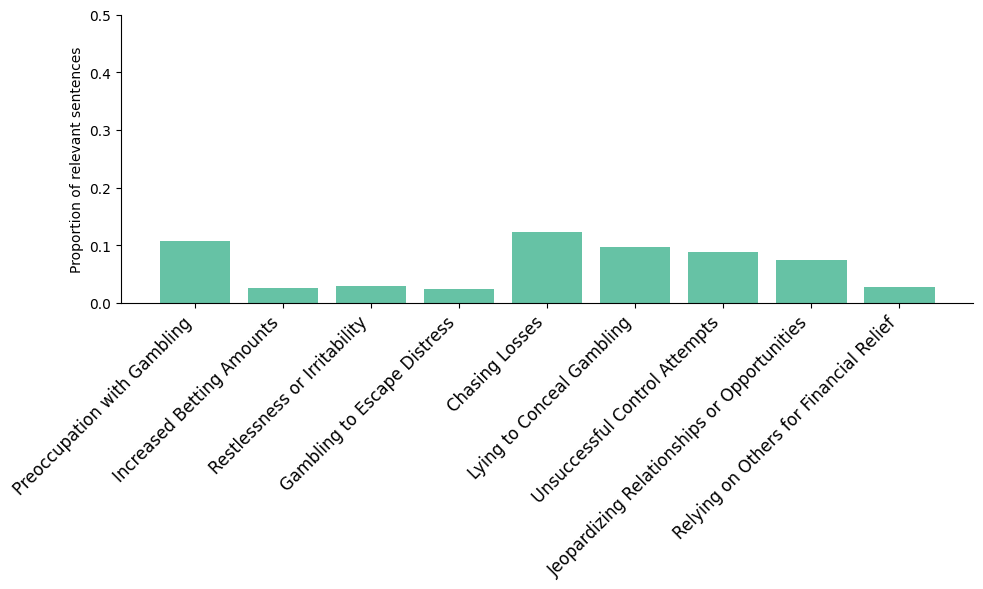

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Ajusta el estilo de seaborn (opcional)
sns.set_style()

titles = [
    "Preoccupation with Gambling",  # 1
    "Increased Betting Amounts",  # 2
    "Restlessness or Irritability",  # 3
    "Gambling to Escape Distress",  # 4
    "Chasing Losses",  # 5
    "Lying to Conceal Gambling",  # 6
    "Unsuccessful Control Attempts",  # 7
    "Jeopardizing Relationships or Opportunities",  # 8
    "Relying on Others for Financial Relief"  # 9
]

# Crea el histograma
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus preferencias
plt.bar(titles, porecentaje_rels, color='#66c2a5')  # 'df['categoria']' en el eje X, 'df['porcentaje_si']' en el eje Y

# Personaliza el histograma (opcional)
plt.title('')  # Ajusta el título según tus necesidades
plt.ylabel('Proportion of relevant sentences')  # Ajusta la etiqueta del eje X
plt.ylim(0,0.5)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rota las etiquetas del eje X para mejor legibilidad
#plt.ylabel('Densidad')  # Ajusta la etiqueta del eje Y
#plt.grid(True)  # Agrega una cuadrícula al gráfico (opcional)
sns.despine()

# Muestra el histograma
plt.tight_layout()
plt.savefig('rels-distribution.png', bbox_inches='tight')
plt.show()